<img style="float: left;;" src='Figures/alinco.png' /></a>


# <center> <font color= #000047> Módulo 2: Aprendizaje supervizado: Regresión Lineal 

## Introducción

El Aprendizaje Supervizado se podría definir como un tipo de aprendizaje en IA en el que un algoritmo es entrenado con variables que incluyen los valores que queremos predecir; a estos valores conocidos se les llama `“etiquetas”` y se usan también para la evaluación del modelo. El aprendizaje supervisado se puede subdividir en dos tipos: 

- Clasificación

- Regresión.

### Clasificación

En cuanto a clasificación, el objetivo es predecir las etiquetas de clase categóricas de nuevos registros, con base en observaciones pasadas. Dependiendo de la etiqueta, se puede decir que la clasificación es binaria o multiclase. 

### Regresión

Respecto a regresión, se trata del proceso estadístico predictivo en el que el modelo intenta predecir un valor continuo (como ventas, precio, calificaciones) mediante la relación entre variables dependientes e independientes. Es decir, se encuentra una ecuación en la que se sustituyen los valores de las variables y como resultado se obtiene el valor a predecir 

### Algunos algortimos de Aprendizaje Supervizado

- **Regresión lineal:** Se trata de una regresión en la que al graficar la ecuación se forma una línea recta. Para obtener dicha ecuación, se usa el método de los cuadrados mínimos.


- **Regresión logística:** Es una regresión usada principalmente en problemas de clasificación binaria. A pesar de la aparente incongruencia, se trata de una regresión porque el resultado de la ecuación es la probabilidad de que pertenezca a una clase, que dependiendo del umbral que se utilice, se clasifica como positivo o negativo.


- **Support Vector Machine (SVM):** Típicamente se usa para problemas de clasificación, pero también se puede usar para regresión. En este algoritmo se construye un hiperplano que separa las clases de datos lo más posible.


- **Árboles de decisión:** Algoritmo de clasificación similar a un diagrama de flujo, en el que se evalúan valores en cada nodo para llegar a una clasificación al final.


- **Random Forest:** Este algoritmo consiste en combinar una gran cantidad de árboles de decisión independientes entre sí para reducir la varianza. Debido al conjunto de árboles, se le dio el nombre de “bosque”.



## Regresión Lineal (Repaso)


Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(0,1)$ y $(1,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(-1,1)$, $(0,0)$ y $(1,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_1(1) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 0 \\ 1 & 1\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-\beta_1=1$.

In [1]:
# Importar numpy y el matplotlib.pyplot
import numpy as np
from matplotlib import pyplot as plt

In [2]:
help(np.linalg.solve)

Help on function solve in module numpy.linalg:

solve(a, b)
    Solve a linear matrix equation, or system of linear scalar equations.
    
    Computes the "exact" solution, `x`, of the well-determined, i.e., full
    rank, linear matrix equation `ax = b`.
    
    Parameters
    ----------
    a : (..., M, M) array_like
        Coefficient matrix.
    b : {(..., M,), (..., M, K)}, array_like
        Ordinate or "dependent variable" values.
    
    Returns
    -------
    x : {(..., M,), (..., M, K)} ndarray
        Solution to the system a x = b.  Returned shape is identical to `b`.
    
    Raises
    ------
    LinAlgError
        If `a` is singular or not square.
    
    See Also
    --------
    scipy.linalg.solve : Similar function in SciPy.
    
    Notes
    -----
    
    .. versionadded:: 1.8.0
    
    Broadcasting rules apply, see the `numpy.linalg` documentation for
    details.
    
    The solutions are computed using LAPACK routine ``_gesv``.
    
    `a` must be squa

In [3]:
#Encontrar beta_0 y beta_1 resolviendo el sistema
A = np.array([[1,0],
             [1,1]])
h = np.array([1,0])
# h = ?
beta = np.linalg.solve(A,h)
beta

array([ 1., -1.])

In [4]:
# A*beta = h
# (A^-1)*A*beta = (A^-1)*h
# I*beta = (A^-1)*h
# beta = (A^-1)*h
beta = np.linalg.inv(A).dot(h)
beta

array([ 1., -1.])

$$y = -x + 1$$

In [6]:
P1 = (0,1)
P2 = (1,0)


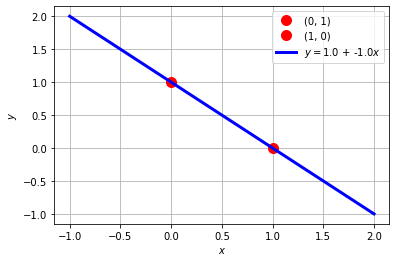

In [11]:
 #Graficando la recata encontrada
plt.figure(figsize=(6,4))
plt.plot(P1[0],P1[1], 'ro', ms=10, label=f'{P1}' )
plt.plot(P2[0],P2[1], 'ro', ms=10, label=f'{P2}' )

x_num = np.linspace(-1,2,num=100)
y_num = beta[0] + beta[1]*x_num

plt.plot(x_num,y_num, 'b', lw=3, label=f'$y=${np.round(beta[0],2)} + {np.round(beta[1],2)}$x$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(-1,1)$, obtenemos $\beta_2(-1)^2 + \beta_1(-1) + \beta_0 = 1$. Ahora, evaluando en el punto $(0,0)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 0$. Finalmente, evaluando en el punto $(1,1)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & -1 & 1 \\ 1 & 0 & 0 \\ 1 & 1 & 1 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=\beta_1=0$ y $\beta_2=1$.

In [12]:
#Encontrar beta_0, beta_1, beta_2
A = np.array([[1,-1,1],
              [1,0,0],
              [1,1,1]])
h = np.array([1,0,1])


In [13]:
beta = np.linalg.solve(A,h)
beta

array([0., 0., 1.])

$$ y = x^2 $$

In [14]:
P1 = (-1,1)
P2 = (0,0)
P3 = (1,1)

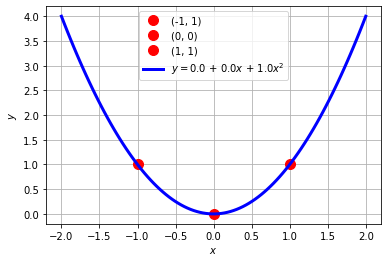

In [16]:
plt.figure(figsize=(6,4))
plt.plot(P1[0],P1[1], 'ro', ms=10, label=f'{P1}' )
plt.plot(P2[0],P2[1], 'ro', ms=10, label=f'{P2}' )
plt.plot(P3[0],P3[1], 'ro', ms=10, label=f'{P3}' )

x_num = np.linspace(-2,2,num=100)
#y_num = beta[0] + beta[1]*x_num
y_num = beta[0] + beta[1]*x_num + beta[2]*x_num**2


plt.plot(x_num,y_num, 'b', lw=3, label=f'$y=${np.round(beta[0],2)} + {np.round(beta[1],2)}$x$ + {np.round(beta[2],2)}$x^2$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de '*bonitos*' en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

In [17]:
N = 100
x = np.linspace(0,10,N)
y = 10 + 2*x + np.random.normal(loc=0,scale=2,size=(N,))


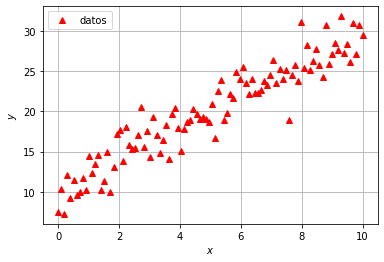

In [18]:
#Graficar datos
plt.figure(figsize=(6,4))
plt.plot(x,y,'^r', label='datos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### ¿Cómo ajustamos una curva a esto?

Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$, de forma que la función evaluada en los puntos $x_i$ ($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\frac{1}{2n}\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-(\beta_0+ \beta_1x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\frac{1}{2n}\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1\quad\dots\quad y_n\right]^T$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

### Ejemplo (gradiente descendente)


El objetivo es estimar el modelo $\hat{y} = \hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).


In [19]:
import pandas as pd

In [ ]:
## ex1data1.txt

In [20]:
data = pd.read_csv('Data/ex1data1.txt', names=['population', 'profit'])
data

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


Text(0, 0.5, 'profit')

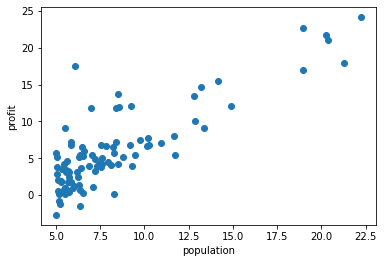

In [21]:
plt.figure(figsize=(6,4))
plt.scatter(data['population'],data['profit'])
plt.xlabel('population')
plt.ylabel('profit')

In [25]:
data[['population']]

,population
0,6.1101
1,5.5277
2,8.5186
3,7.0032
4,5.8598
...,...
92,5.8707
93,5.3054
94,8.2934
95,13.3940


In [26]:
X_df = data[['population']]
X_df

,population
0,6.1101
1,5.5277
2,8.5186
3,7.0032
4,5.8598
...,...
92,5.8707
93,5.3054
94,8.2934
95,13.3940


In [28]:
Y_df = data[['profit']]
Y_df

,profit
0,17.59200
1,9.13020
2,13.66200
3,11.85400
4,6.82330
...,...
92,7.20290
93,1.98690
94,0.14454
95,9.05510


$$ \hat{y} = \beta_1x + \beta_0$$
$$ \hat{y} = X  \beta$$
$$ X = [x, 1]$$
$$ \beta = [\beta_1, \beta_0]$$

# Implementar la función de costo 

Formalmente definimos la funcion de costo como el error cuadrático medio, qué deberemos minimizar.

$$ J(\beta) = \frac{1}{2m}\sum_{i=1}^m (\hat{y}(x_i) - y_i)^2$$

$\beta = [\beta_0, \beta_1]$

si derivamos parcialmente e igualamos a cero $\frac{\partial J(\beta)}{\partial \beta}=0$

tendríamos que las ecuaciones del algoritmo de gradiente descendente son:

$$ \beta_0 = \beta_0 - \alpha \frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i)$$

$$ \beta_1 = \beta_1 - \alpha \frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i)x_i$$



$$X=[1;x]$$
$$\beta=[\beta_0;\beta_1]$$
$$\hat{y}=X^T\beta = \beta_1 x +\beta_0$$


### implementacion de la función de costo

In [30]:
def cost_function(X,y,beta):
    m=len(y)
    #Calcular la función de costo
    J = np.sum((X.dot(beta) - y)**2)/(2*m)
    return J

In [32]:
X_df['one'] = 1
X_df

,population,one
0,6.1101,1
1,5.5277,1
2,8.5186,1
3,7.0032,1
4,5.8598,1
...,...,...
92,5.8707,1
93,5.3054,1
94,8.2934,1
95,13.3940,1


In [37]:
X = X_df.values
y = np.array(Y_df).flatten()


(97,)

In [38]:
beta=np.array([0,0])
beta

array([0, 0])

In [39]:
cost_function(X,y,beta)

32.072733877455676

$$ \beta_0 = \beta_0 - \alpha \frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i)$$

$$ \beta_1 = \beta_1 - \alpha \frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i)x_i$$



In [40]:
# algoritmo de gradiente descendente
def gradiente_descent(X,y,beta,alpha,iterations):
    cost_history = [0]*iterations
    m=len(y)
    for it in range(iterations):
        y_hat = X.dot(beta)
        loss = (y_hat - y)
        gradiente = X.T.dot(loss)/m
        beta = beta - alpha*gradiente
        
        cost = cost_function(X,y,beta)
        cost_history[it] = cost
        
    return beta, cost_history
        

In [41]:
iterations = 15000
alpha=0.01


In [42]:
(beta, cost_history) = gradiente_descent(X,y,beta,alpha,iterations)

In [43]:
beta

array([ 1.19303364, -3.89578088])

In [44]:
cost_history

[6.737190464870009,
 5.9315935686049555,
 5.901154707081388,
 5.895228586444221,
 5.8900949431173295,
 5.885004158443647,
 5.879932480491418,
 5.874879094762575,
 5.869843911806385,
 5.8648268653129305,
 5.859827889932181,
 5.85484692057229,
 5.849883892376587,
 5.844938740722034,
 5.840011401218361,
 5.835101809707226,
 5.830209902261388,
 5.825335615183863,
 5.820478885007099,
 5.815639648492154,
 5.810817842627869,
 5.806013404630044,
 5.801226271940628,
 5.7964563822269,
 5.7917036733806535,
 5.7869680835173956,
 5.782249550975539,
 5.777548014315596,
 5.772863412319381,
 5.768195683989212,
 5.76354476854712,
 5.758910605434047,
 5.754293134309077,
 5.749692295048629,
 5.745108027745684,
 5.740540272709012,
 5.735988970462381,
 5.731454061743792,
 5.726935487504702,
 5.722433188909257,
 5.717947107333529,
 5.713477184364749,
 5.709023361800549,
 5.704585581648199,
 5.700163786123857,
 5.695757917651815,
 5.691367918863751,
 5.68699373259798,
 5.682635301898707,
 5.678292570015292,


$$\hat{y} = 1.193 x - 3.89$$

Text(0, 0.5, 'profit')

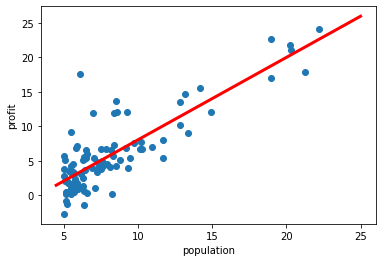

In [47]:
plt.figure(figsize=(6,4))
plt.scatter(data['population'],data['profit'])
x_num = np.linspace(4.5,25,num=100)
y_num = beta[0]*x_num + beta[1]

plt.plot(x_num,y_num,'r', lw=3)
plt.xlabel('population')
plt.ylabel('profit')

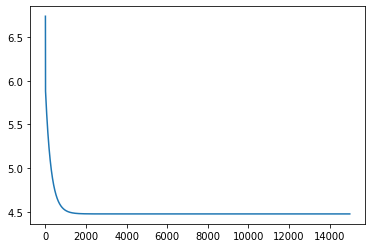

In [48]:
plt.plot(cost_history)

In [49]:
# Predecir un nuevo valor

# y_pred = [x,1]*beta
x_new = 17
y_predict = np.array([x_new,1]).dot(beta) # y= beta1x+beta0


In [50]:
y_predict

16.385791072906276

In [51]:
#[xn1,xn2; 1,1]
X_new = np.array([[17,1],
                  [19,1]])


In [52]:
def predict(X_new, beta):
    return X_new.dot(beta)
    

In [54]:
predict(X_new, beta)

array([16.38579107, 18.77185836])

## Ejemplo (scipy)

In [56]:
# Importar el módulo optimize de la librería scipy
from scipy import optimize as opt

In [59]:
help(opt.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is an 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see her

Parámetros importantes:
- fun: función $f(x)$, se debe definir antes de llamar minimize, como `def f(x): ... return ...`
- x0: valor inicial. En una función no lineal, en general, hay múltiples mínimos. Dependiendo de la semilla caerá en uno de esos mínimos. Se ingresa como $x0 = \text{np.array}([x_{01},\dots,x_{0n}])$.
- bounds: como en linprog.
- constraints: funciones que definen las restricciones $g_i(x)$ y $h_j(x)$. Se definen igual que $f(x)$ y se ingresan como {'ineq': g_i, 'eq': h_j}.

Primero debemos construir la función objetivo y la semilla inicial:

In [61]:
N = 100
x = np.linspace(0,10,N)
y = 10 + 2*x + np.random.normal(loc=0,scale=2,size=(N,))


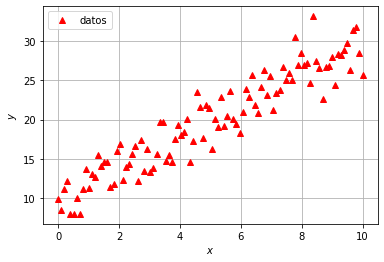

In [62]:
#Graficar datos
plt.figure(figsize=(6,4))
plt.plot(x,y,'^r', label='datos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

In [66]:
def min_sq(beta,x_points,y_points):
    n=len(x_points)
    f_hat = beta[0]+beta[1]*x_points
    J = (1/(2*n))*((y_points-f_hat)**2).sum()
    return J

In [67]:
beta_ini = [0,0]


In [68]:
sol = opt.minimize(fun = min_sq, x0= beta_ini, args=(x,y))
sol

      fun: 2.2763230385740254
 hess_inv: array([[ 3.86549339, -0.57374336],
       [-0.57374336,  0.1148718 ]])
      jac: array([ 8.94069672e-08, -3.18884850e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([9.84475891, 2.00599516])

In [69]:
beta = sol.x
beta

array([9.84475891, 2.00599516])

$$ \hat{f} = 2.005x + 9.844$$

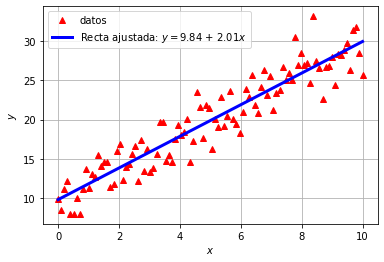

In [71]:
# Grafica de los puntos y la recta ajustada
# Graficar la recta resultamte que más se ajusta a lso datos
#Graficar datos
plt.figure(figsize=(6,4))
plt.plot(x,y,'^r', label='datos')
y_num = beta[0]+beta[1]*x

plt.plot(x,y_num, 'b',lw=3, label=f'Recta ajustada: $y=${np.round(beta[0],2)} + {np.round(beta[1],2)}$x$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

## Ejemplo Usando la librería de sklearn

### Ejemplo1:

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [73]:
data = pd.read_csv('Data/ex1data1.txt', names=['population','profit'])
data

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [74]:
x = data['population'].values.reshape(-1,1)
y = data['profit'].values.reshape(-1,1)

In [75]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [80]:
b1=model.coef_
b1

array([[1.19303364]])

- **model.coef**: Coeficientes que acompañan a la variable independiente $\beta_1, ..., \beta_n$

In [79]:
b0 = model.intercept_
b0

array([-3.89578088])

- **model.intercept_**: Coeficiente de intercepción al eje de las abcisas $\beta_0$

In [81]:
beta=[b0,b1]
beta

[array([-3.89578088]), array([[1.19303364]])]

### Modelo obtenido:
$$ \hat{y} = 1.19x -3.895$$

In [84]:
model.predict(np.array([23]).reshape(1,-1))

array([[23.54399294]])

In [ ]:
# Graficar la recta resultamte que más se ajusta a lso datos


#### ¿Cómo predecir un nuevo elemento?

## Ejemplo 2:

In [85]:
datos = pd.read_csv('Data/Position_Salaries.csv')
datos

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [86]:
x= datos['Level'].values.reshape(-1,1)
y= datos['Salary'].values.reshape(-1,1)

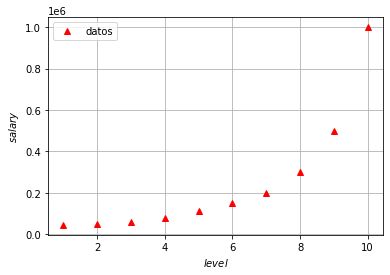

In [87]:
#Graficar datos
plt.figure(figsize=(6,4))
plt.plot(x,y,'^r', label='datos')
plt.xlabel('$level$')
plt.ylabel('$salary$')
plt.legend(loc='best')
plt.grid()

Error cuadrático medio: 26695878787.878788
r2_score: 0.6690412331929895


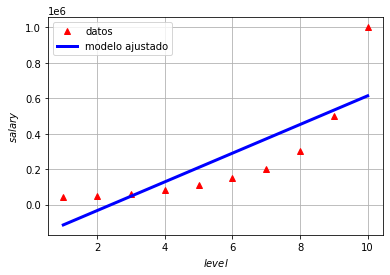

In [91]:
#Aplicar un modelo de regresion lineal 
#1.- entrnamiento de los datos usando LinearRegression
model = LinearRegression()
model.fit(x,y)

#2.- Valores predecidos de x
y_pred = model.predict(x)

#3.- Graficar el modelo con los datos
plt.figure(figsize=(6,4))
plt.plot(x,y,'^r', label='datos')
plt.plot(x,y_pred,'b',lw=3, label='modelo ajustado')
plt.xlabel('$level$')
plt.ylabel('$salary$')
plt.legend(loc='best')
plt.grid()

#4.- obtenomos el error del modelo
print(f'Error cuadrático medio: {mean_squared_error(y,y_pred)}')
print(f'r2_score: {r2_score(y,y_pred)}')

## Regresión Polinomial

### Aplicar un modelo polinomial de grado 2

In [ ]:
# y_hat = beta_2*x^2 + beta_1*x + beta_0

In [92]:
from sklearn.preprocessing import PolynomialFeatures

In [101]:
poly = PolynomialFeatures(degree=3, include_bias=True)
x_poly = poly.fit_transform(x)

In [102]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [103]:
x_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [104]:
# y_hat = beta_2x^2 + beta_1 x + beta_0

Error cuadrático medio: 1515662004.6620107
r2_score: 0.9812097727913366


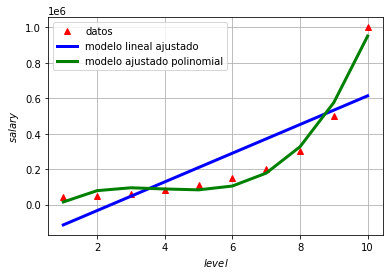

In [105]:
#Obtener el modelo polinomial

#1.-
model = LinearRegression()
model.fit(x_poly, y)

#2.-
y_pred_pol = model.predict(x_poly)

#3.- Graficar
plt.figure(figsize=(6,4))
plt.plot(x,y,'^r', label='datos')
plt.plot(x,y_pred,'b',lw=3, label='modelo lineal ajustado ')
plt.plot(x,y_pred_pol,'g',lw=3, label='modelo ajustado polinomial')
plt.xlabel('$level$')
plt.ylabel('$salary$')
plt.legend(loc='best')
plt.grid()

#4.- obtenomos el error del modelo
print(f'Error cuadrático medio: {mean_squared_error(y,y_pred_pol)}')
print(f'r2_score: {r2_score(y,y_pred_pol)}')

## Actividad : Predecir los niveles utilizando un modelo polinomial de grado 3

- Crear un modelo polinomial de grado 3
- Predecir los siguientes niveles: x_new=[11, 13, 15]
- Graficar los salarios de los valores de x_new

$$\hat{y} = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0$$

In [106]:
model.coef_

array([[     0.        , 180664.33566432, -48548.95104895,
          4120.04662005]])

In [107]:
model.intercept_

array([-121333.33333331])

In [108]:
b3 = model.coef_[0,3]
b2 = model.coef_[0,2]
b1 = model.coef_[0,1]
b0 = model.intercept_


In [109]:
x_new=4.5
y_new_pred = b3*x_new**3 + b2*x_new**2 + b1*x_new + b0
y_new_pred

array([83979.16666666])

In [113]:
x_new = np.array([[4.5]])
x_new_poly = poly.fit_transform(x_new)
x_new_poly

array([[ 1.   ,  4.5  , 20.25 , 91.125]])

In [114]:
model.predict(x_new_poly)

array([[83979.16666667]])

In [115]:
x_new = np.array([[4.5],[2.5],[11],[15]])
x_new_poly = poly.fit_transform(x_new)
x_new_poly

array([[1.0000e+00, 4.5000e+00, 2.0250e+01, 9.1125e+01],
       [1.0000e+00, 2.5000e+00, 6.2500e+00, 1.5625e+01],
       [1.0000e+00, 1.1000e+01, 1.2100e+02, 1.3310e+03],
       [1.0000e+00, 1.5000e+01, 2.2500e+02, 3.3750e+03]])

In [116]:
model.predict(x_new_poly)

array([[  83979.16666667],
       [  91272.29020979],
       [1475333.33333331],
       [5570275.05827491]])

## Regresión Lineal Multiple

## Ejemplo

In [118]:
dataset = pd.read_csv('Data/50_startups.csv')
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [121]:
#definir las variables dependientes e independientes
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [122]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [124]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [127]:
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(),[3])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [129]:
#construir el modelo de regresion multiple
from sklearn.linear_model import LinearRegression

In [130]:
modelo_mult = LinearRegression()
modelo_mult.fit(X, y)


LinearRegression()

In [132]:
y_pred = modelo_mult.predict(X)
y_pred

array([192390.57136321, 189071.32010493, 182276.18673285, 173584.97618976,
       172277.13381668, 163473.80711842, 158099.29278418, 160155.64464938,
       151634.74332631, 154829.66252709, 135664.64259064, 135528.60078161,
       129282.91780691, 127431.24898632, 149694.38277549, 146143.63551379,
       116854.0745287 , 130085.40993358, 129149.72574274, 115594.18840731,
       116570.73444001, 117201.50508973, 114833.30513843, 110123.79610587,
       113294.37345155, 102200.26891867, 110765.30116879, 114279.8040301 ,
       101818.5873869 , 101721.0420294 ,  99629.0105373 ,  97617.2963202 ,
        98988.23660304,  98061.35894838,  88974.70416293,  90420.0096061 ,
        75423.09286559,  89577.70222197,  69606.52160904,  83684.97603991,
        74762.74617647,  74956.31104908,  70575.99371382,  60100.2682187 ,
        64585.14721291,  47588.36470993,  56272.99268495,  46468.23200484,
        49123.07308287,  48185.03879259])

In [133]:
print(f'r2_score: {r2_score(y,y_pred)}')

r2_score: 0.9507524843355148


In [134]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

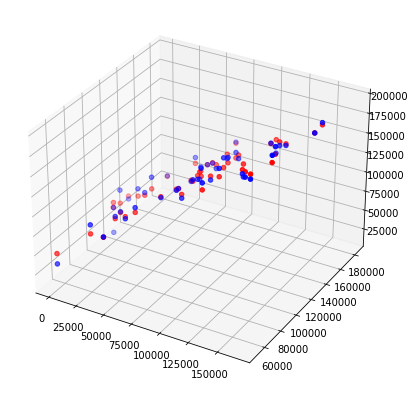

In [138]:
#elegir variables para graficar
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')

ax.scatter3D(dataset['R&D Spend'], dataset['Administration'], dataset['Profit'], c='b')
ax.scatter3D(dataset['R&D Spend'], dataset['Administration'], y_pred, c='r')